In [1]:
!pip install pandas matplotlib seaborn wordcloud


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import string

In [2]:
df = pd.read_csv("val_data.csv")
df.head()

,Id,Tweet,Hate,Fake
0,5709,still searching for nano gps chip in notes abh...,0,0
1,6668,dharam sirf ek hai wo sanatan dharm hai brbaki...,0,0
2,1035,amit shah ji kaun se jamaat mein gaye the arna...,1,1
3,2400,sir corona virus se hum jeet chuke hote agar y...,1,1
4,4170,har roz jakham kha ke hindus of bangladesh aur...,1,1


Class Distribution for Hate:
1    513
0    286
Name: Hate, dtype: int64



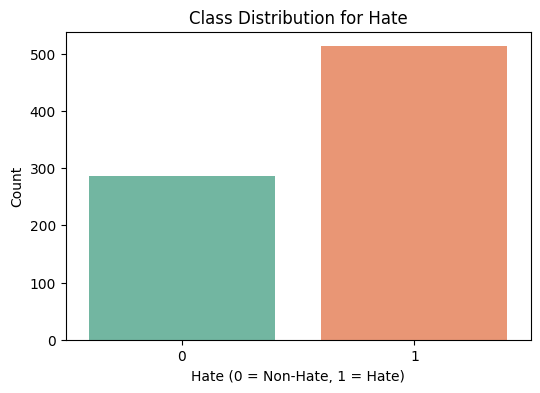

Class Distribution for Fake:
1    423
0    376
Name: Fake, dtype: int64



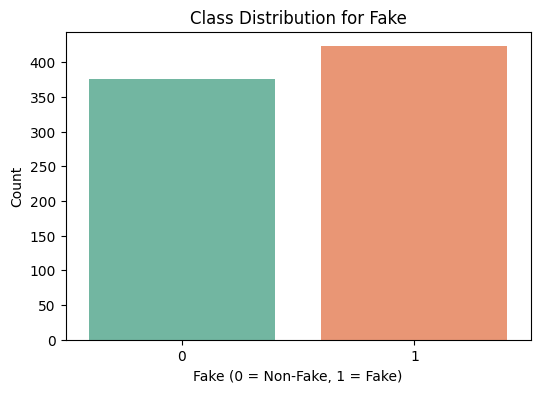

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the class distribution for 'Hate'
hate_counts = df['Hate'].value_counts()
print(f"Class Distribution for Hate:\n{hate_counts}\n")

# Plot: Class Distribution for 'Hate'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Hate', palette='Set2')
plt.title('Class Distribution for Hate')
plt.xlabel('Hate (0 = Non-Hate, 1 = Hate)')
plt.ylabel('Count')
plt.show()

# Print the class distribution for 'Fake'
fake_counts = df['Fake'].value_counts()
print(f"Class Distribution for Fake:\n{fake_counts}\n")

# Plot: Class Distribution for 'Fake'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Fake', palette='Set2')
plt.title('Class Distribution for Fake')
plt.xlabel('Fake (0 = Non-Fake, 1 = Fake)')
plt.ylabel('Count')
plt.show()

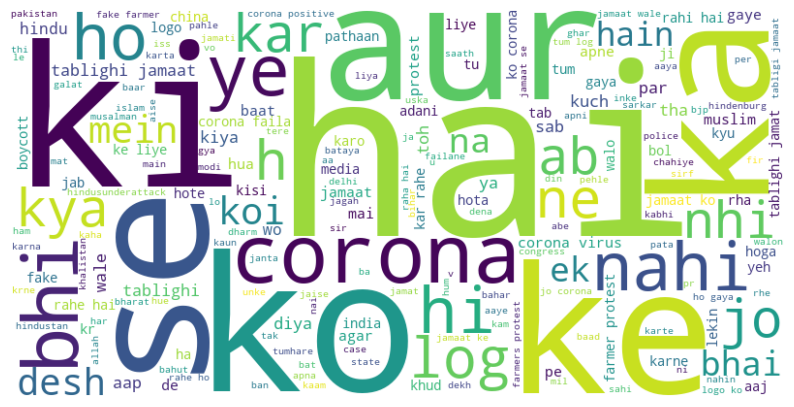

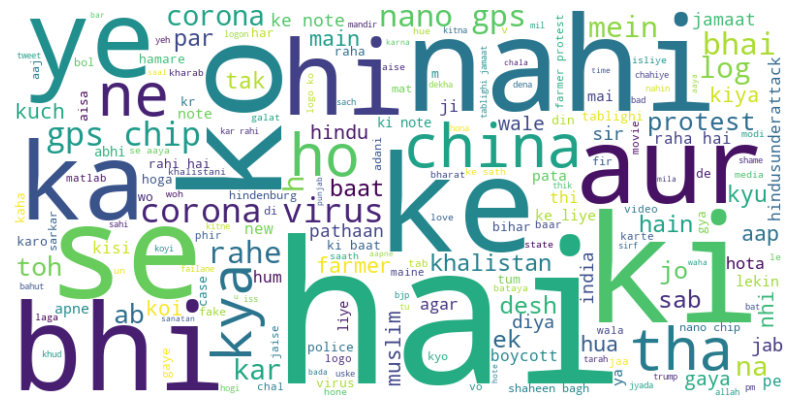

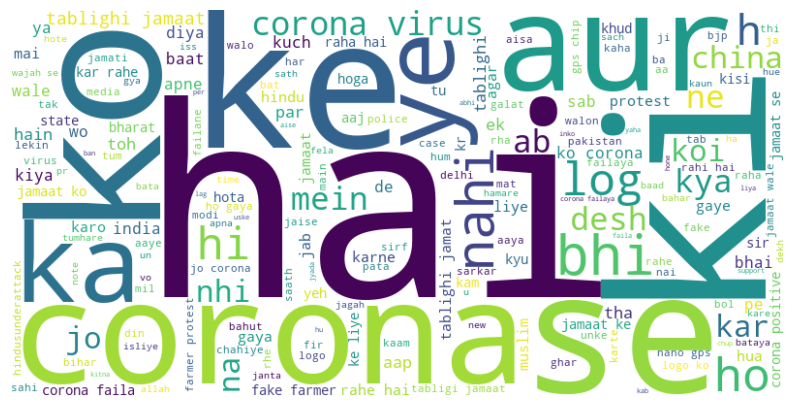

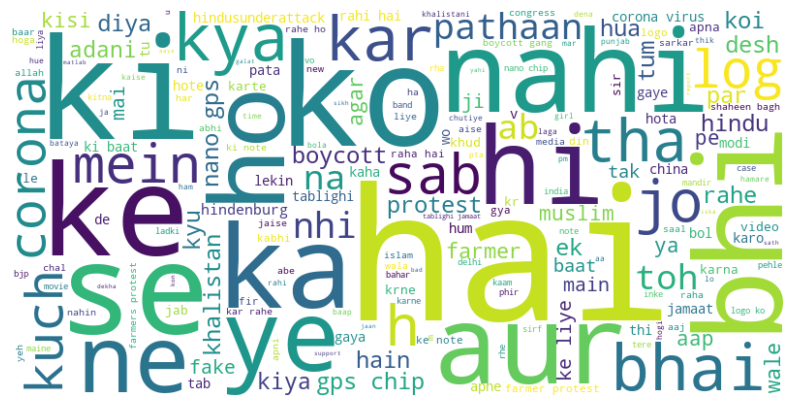

In [4]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Word Cloud for Hate Tweets
hate_tweets = ' '.join(df[df['Hate'] == 1]['Tweet'])
generate_wordcloud(hate_tweets)

# Word Cloud for Non-Hate Tweets
non_hate_tweets = ' '.join(df[df['Hate'] == 0]['Tweet'])
generate_wordcloud(non_hate_tweets)

# Word Cloud for Fake Tweets
fake_tweets = ' '.join(df[df['Fake'] == 1]['Tweet'])
generate_wordcloud(fake_tweets)

# Word Cloud for Non-Fake Tweets
non_fake_tweets = ' '.join(df[df['Fake'] == 0]['Tweet'])
generate_wordcloud(non_fake_tweets)

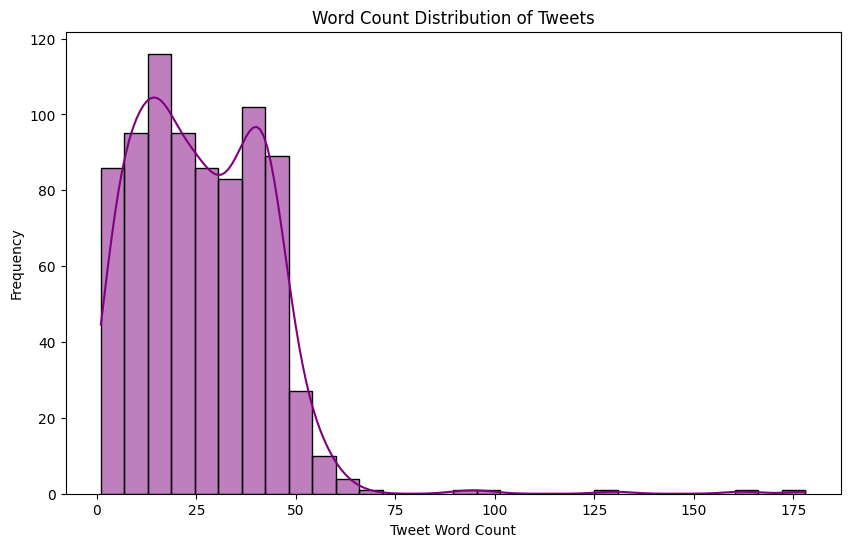

Max Word Count of Tweets: 178
Min Word Count of Tweets: 1
count    799.000000
mean      26.511890
std       17.101922
min        1.000000
25%       13.500000
50%       25.000000
75%       39.000000
max      178.000000
Name: Tweet_Word_Count, dtype: float64


In [5]:
df['Tweet_Word_Count'] = df['Tweet'].apply(lambda x: len(x.split()))

# Plot word count distribution of tweets
plt.figure(figsize=(10, 6))
sns.histplot(df['Tweet_Word_Count'], bins=30, kde=True, color='purple')
plt.title('Word Count Distribution of Tweets')
plt.xlabel('Tweet Word Count')
plt.ylabel('Frequency')
plt.show()

# Max and Min Word Count of Tweets
max_word_count = df['Tweet_Word_Count'].max()
min_word_count = df['Tweet_Word_Count'].min()

print(f"Max Word Count of Tweets: {max_word_count}")
print(f"Min Word Count of Tweets: {min_word_count}")

# Display Statistics
print(df['Tweet_Word_Count'].describe())

In [9]:
# Function to clean text and get word counts
def get_common_words(text_series):
    all_words = ' '.join(text_series).lower()
    # Remove punctuation
    all_words = all_words.translate(str.maketrans('', '', string.punctuation))
    words = all_words.split()
    word_counts = Counter(words)
    return word_counts.most_common(10)

# Common Words in Hate Tweets
hate_word_counts = get_common_words(df[df['Hate'] == 1]['Tweet'])
print("Most Common Words in Hate Tweets:")
print(hate_word_counts)

# Common Words in Non-Hate Tweets
non_hate_word_counts = get_common_words(df[df['Hate'] == 0]['Tweet'])
print("Most Common Words in Non-Hate Tweets:")
print(non_hate_word_counts)

# Common Words in Fake Tweets
fake_word_counts = get_common_words(df[df['Fake'] == 1]['Tweet'])
print("Most Common Words in Fake Tweets:")
print(fake_word_counts)

# Common Words in Non-Fake Tweets
non_fake_word_counts = get_common_words(df[df['Fake'] == 0]['Tweet'])
print("Most Common Words in Non-Fake Tweets:")
print(non_fake_word_counts)

Most Common Words in Hate Tweets:
[('hai', 3108), ('corona', 2406), ('ke', 1749), ('ko', 1656), ('ki', 1656), ('se', 1649), ('jamaat', 1391), ('to', 1187), ('me', 1142), ('ka', 1086)]
Most Common Words in Non-Hate Tweets:
[('hai', 2317), ('ki', 1290), ('ke', 1190), ('ko', 1137), ('se', 970), ('ka', 880), ('to', 814), ('bhi', 805), ('me', 790), ('aur', 712)]
Most Common Words in Fake Tweets:
[('hai', 3710), ('corona', 2231), ('ki', 2074), ('ke', 2067), ('ko', 1991), ('se', 1821), ('jamaat', 1439), ('to', 1431), ('aur', 1339), ('ka', 1330)]
Most Common Words in Non-Fake Tweets:
[('hai', 1715), ('ke', 872), ('ki', 872), ('ko', 802), ('se', 798), ('ka', 636), ('me', 603), ('corona', 603), ('bhi', 570), ('to', 570)]
